In [ ]:
# ライブラリの読み込み
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ファイルの読み込み
sales = pd.read_csv('../Data/daily_sales.csv')

In [ ]:
# データ型の確認
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    150 non-null    object
 1   sales   150 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [ ]:
# object型からint64に直す
sales['date'] = pd.to_datetime(sales['date'])
sales['date'] = sales['date'].dt.strftime('%Y-%m')

In [ ]:
# 月ごとの売り上げの集計とカラムのリネーム
monthly_sales = sales.groupby('date', as_index=False)['sales'].sum()
monthly_sales = sales.rename(columns={'date': 'month'})

<BarContainer object of 150 artists>

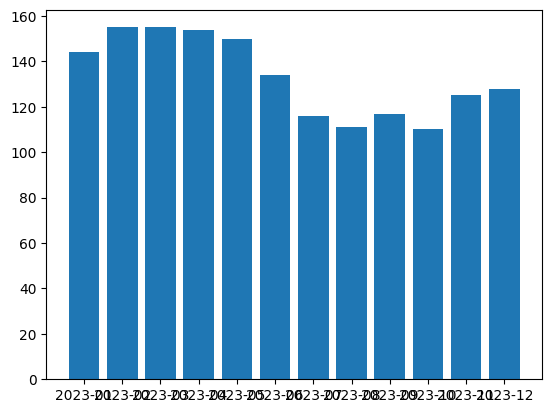

In [ ]:
# グラフの可視化
plt.bar(monthly_sales['month'], monthly_sales['sales'])

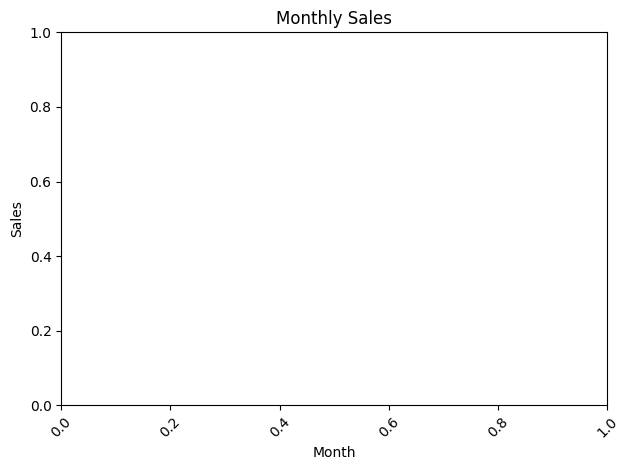

In [ ]:
# グラフを見やすくする
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 今日の学び

## 学んだ内容
- 日付売上データをCSVとして作成し、日付（object型）と売上カラムを持つ形式に整えた。
  → データを加工しやすくする方法を理解した。
- 月ごとの売上に集計するために、`groupby` を活用し、月単位の売上合計を算出できるようにした。
  → 日付データから集計し、分析の粒度を変える方法を学んだ。
- `plt.bar()` を用いて、月ごとの売上推移を棒グラフで可視化した。
  → 集計結果を直感的に比較できる方法を習得した。

## 所感
- データの形を自由に変えることができるのは便利だが、必要に応じてリネームもしないとややこしくなると感じた。
- 日ごとのデータを扱いながら月ごとにまとめる流れは、実際の業務でも使うのではないかと思った。
- 今後は単なる集計や可視化に加えて、季節性やトレンドを考慮した分析などにも挑戦したい。